In [70]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [71]:
# Fuzzy controller based off of example here: 
# https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html#example-plot-tipping-problem-newapi-py

# New Antecedent/Consequent objects hold universe variables and membership functions
distance = ctrl.Antecedent(np.arange(0, 100, 1), 'distance')
current_speed = ctrl.Antecedent(np.arange(0, 100, 1), 'current_speed')
adjust_speed = ctrl.Consequent(np.arange(-100, 100, 1), 'adjust_speed')

In [72]:
# membership functions
distance['close'] = fuzz.trimf(distance.universe, [0, 0, 50])
distance['matched'] = fuzz.trimf(distance.universe, [0, 50, 100])
distance['far'] = fuzz.trimf(distance.universe, [50, 100, 100])

current_speed['slow'] = fuzz.trimf(current_speed.universe, [0, 0, 50])
current_speed['med'] = fuzz.trimf(current_speed.universe, [0, 50, 100])
current_speed['fast'] = fuzz.trimf(current_speed.universe, [50, 100, 100])

adjust_speed['brake'] = fuzz.trimf(adjust_speed.universe, [-100, -100, 0])
adjust_speed['do_nothing'] = fuzz.gaussmf(adjust_speed.universe, 0, 10)
adjust_speed['accelerate'] = fuzz.trimf(adjust_speed.universe, [0, 100, 100])

C:\Users\Beau\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Beau\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Beau\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


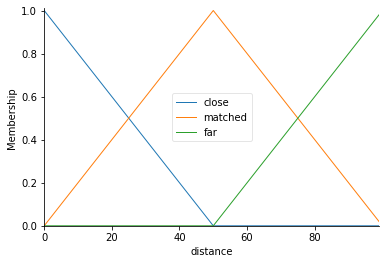

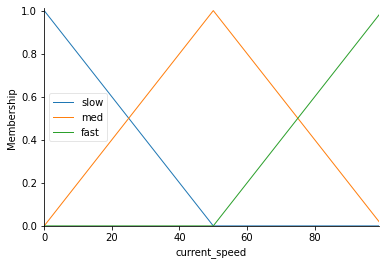

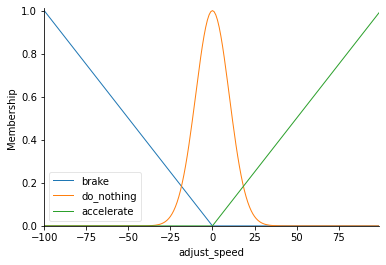

In [73]:
# Visualise membership functions
distance.view()
current_speed.view()

adjust_speed.view()

In [74]:
# Define Rules
close_slow = ctrl.Rule(distance['close'] & current_speed['slow'], adjust_speed['brake'])
close_matched = ctrl.Rule(distance['close'] & current_speed['med'], adjust_speed['brake'])
close_fast = ctrl.Rule(distance['close'] & current_speed['fast'], adjust_speed['brake'])
matched_slow = ctrl.Rule(distance['matched'] & current_speed['slow'], adjust_speed['do_nothing'])
matched_med = ctrl.Rule(distance['matched'] & current_speed['med'], adjust_speed['do_nothing'])
matched_fast = ctrl.Rule(distance['matched'] & current_speed['fast'], adjust_speed['do_nothing'])
far_slow = ctrl.Rule(distance['far'] & current_speed['slow'], adjust_speed['accelerate'])
far_med = ctrl.Rule(distance['far'] & current_speed['med'], adjust_speed['do_nothing'])
far_fast = ctrl.Rule(distance['far'] & current_speed['fast'], adjust_speed['brake'])


In [75]:
# Create control system
dist_ctrl = ctrl.ControlSystem([close_slow, close_matched, close_fast, matched_slow, matched_med, matched_fast, far_slow, far_med, far_fast])

In [76]:
# Simulate control system
fuzzctrl = ctrl.ControlSystemSimulation(dist_ctrl)

In [77]:
# Provide inputs to distance and current speed - compute to obtain result
fuzzctrl.input['distance'] = 0
fuzzctrl.input['current_speed'] = 100

fuzzctrl.compute()

-66.6535947712419


C:\Users\Beau\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


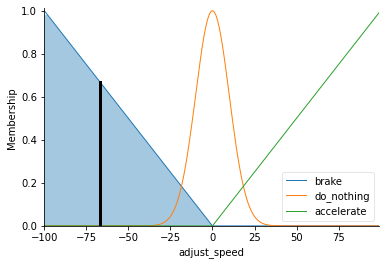

In [78]:
# Print result and visualise
print(fuzzctrl.output['adjust_speed'])

adjust_speed.view(sim=fuzzctrl)